!pip3 install control


In [1]:
import control as co
import numpy as np
import matplotlib.pyplot as plt

## Defining Transfer Function; G1(s) = 3/(s^2 + 2s +3)

In [2]:
G1 = co.tf([3], [1,2,3]) #Calling transfer function from co and passing the neumarator and denominator co-eff as a list.
G1                       #Same as Matlab

TransferFunction(array([3]), array([1, 2, 3]))

In [4]:
#This way also we can do, if we have a complex transfer function.
s = co.tf('s') # s is a TF valiable 
G2 = 3/((s*s) + (2*s) +3)
G2

TransferFunction(array([3]), array([1, 2, 3]))

## Operations on TF's

In [14]:
G = co.tf([2,3], [4,5,2])
H = co.tf([5], [1,1])
print(G)

print(H)

cascade = G * H
print('Cascade: - ', cascade)

parallel_ = G + H
print('Parallel + : - ', parallel_)

parallel__ = G - H
print('Parallel - : - ', parallel__)

gain = 5*G
print('Gain:- ', gain)

division = G/H
print('Divivsion :-', division)


    2 s + 3
---------------
4 s^2 + 5 s + 2


  5
-----
s + 1

Cascade: -  
       10 s + 15
-----------------------
4 s^3 + 9 s^2 + 7 s + 2

Parallel + : -  
  22 s^2 + 30 s + 13
-----------------------
4 s^3 + 9 s^2 + 7 s + 2

Parallel - : -  
  -18 s^2 - 20 s - 7
-----------------------
4 s^3 + 9 s^2 + 7 s + 2

Gain:-  
   10 s + 15
---------------
4 s^2 + 5 s + 2

Divivsion :- 
 2 s^2 + 5 s + 3
------------------
20 s^2 + 25 s + 10



## Creating a closed loop TF, H is the feedback TF, G is the forward path TF.

In [16]:
negfeed = co.feedback(G, H) #Negative Feedback
print(negfeed)

posfeed = co.feedback(G, H, sign=1) #Positive Feedback
print(posfeed)


     2 s^2 + 5 s + 3
-------------------------
4 s^3 + 9 s^2 + 17 s + 17


    2 s^2 + 5 s + 3
------------------------
4 s^3 + 9 s^2 - 3 s - 13



## Poles and Zeros

In [17]:
poles = G.pole() #Pole locations
poles

array([-0.625+0.33071891j, -0.625-0.33071891j])

In [18]:
zeros = G.zero() #Zero locations
zeros

array([-1.5])

## Impulse Response 

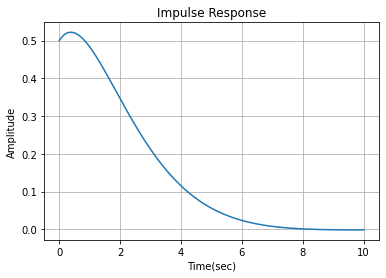

In [20]:
t = np.linspace(0,10,1000) #Taking 1000 points between 0 to 10
_, y = co.impulse_response(G, t) #Calculates the impulse response of G
plt.plot(t, y)
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.title('Impulse Response')
plt.grid()


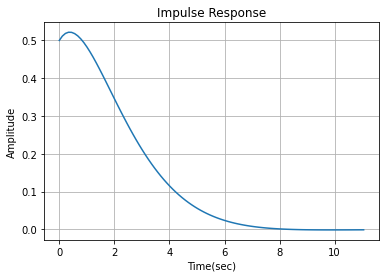

In [21]:
#t = np.linspace(0,10,1000) #Taking 1000 points between 0 to 10
t, y = co.impulse_response(G) #Calculates the impulse response of G
plt.plot(t, y)
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.title('Impulse Response')
plt.grid()


## Step Response

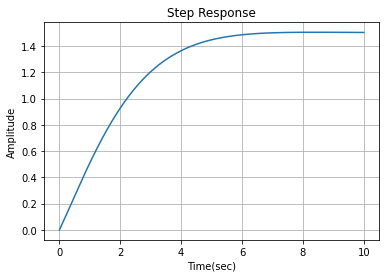

In [23]:
t = np.linspace(0,10,1000) #Taking 1000 points between 0 to 10
_, y = co.step_response(G, t) #Calculates the step response of G
plt.plot(t, y)
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.title('Step Response')
plt.grid()


## Now lets compare the step response of 2nd order systems (without zeros) G(s) = Wn^2/(s^2 + 2*d*Wn*s + Wn^2), for Wn = 1 (undamped natural frequency = 1 rad/s) and diff values of d (the damping ration)

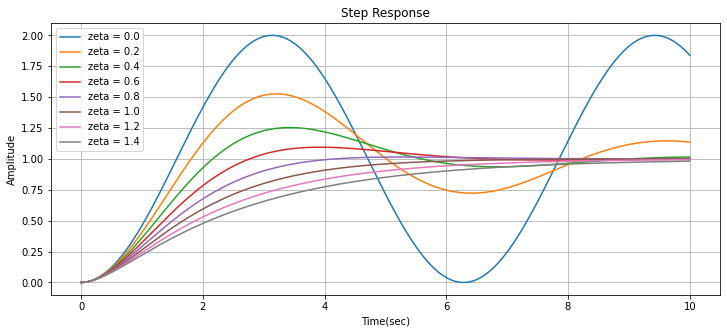

In [26]:
t = np.linspace(0,10,1000)
plt.figure(figsize=(12,5))

for zeta in np.arange(0, 1.6, 0.2):
    G = co.tf([1], [1,2*zeta, 1])
    _,y = co.step_response(G,t)
    plt.plot(t, y, label = f'zeta = {zeta:0.2}')
    
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.title('Step Response')
plt.grid()
plt.legend()